# Trajectory completion with Constant Velocity, Constant Yaw model

In [1]:
# Load data

import numpy as np
import pickle 
from matplotlib import pyplot as plt 
trajectory_file = open("../spherical-code-paper/trajectories.pyo", "rb")
trajs = pickle.load(trajectory_file)
y_vec = np.array(trajs['y_vec'])
t_vec = np.array(trajs['t_vec'])
del trajs
trajectory_file.close()
del trajectory_file

Text(0, 0.5, 'Roadwise coordinate (ft)')

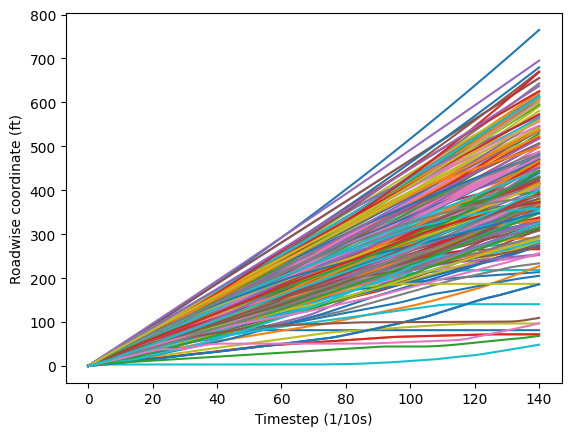

In [2]:
for traj in range(y_vec.shape[0]):
    plt.plot(y_vec[traj])
plt.xlabel('Timestep (1/10s)')
plt.ylabel('Roadwise coordinate (ft)')

In [26]:
t_seen = [30] # data is seen until timestep t_seen
d_thr = 5 # 3ft is the error which will trigger the cutoff of the prediction horizon


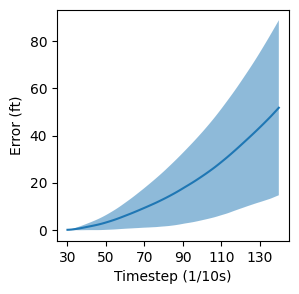

<Figure size 300x300 with 0 Axes>

In [51]:
v_at_t_seen = np.array(len(t_seen),)

for i, ts in enumerate(t_seen):
    # Velocity at timestep ts
    v_at_t_seen = y_vec[:, ts] - y_vec[:, ts-1]
    # Predict the remaining trajectory from ts to 141
    # Use the velocity at ts to predict the remaining trajectory
    y_from_t_seen = np.zeros((y_vec.shape[0], 141-ts))
    for traj in range(y_vec.shape[0]):
        y_from_t_seen[traj] = y_vec[traj, ts] + v_at_t_seen[traj] * np.arange(141-ts)
    # Compute the error between the predicted trajectory and the ground truth
    error = np.abs(y_from_t_seen - y_vec[:, ts:])
    error_avg = np.average(np.abs(y_from_t_seen - y_vec[:, ts:]), axis=0)
    error_std = np.std(np.abs(y_from_t_seen - y_vec[:, ts:]), axis=0)
    # Find the first timestep where the error is greater than d_thr
    t_cutoff = np.argmax(error > d_thr, axis=1)

    # Plot the error
    plt.figure(figsize=(3,3))
    plt.plot(np.arange(ts, 141), error_avg)
    # shade the confidence interval
    plt.fill_between(np.arange(ts, 141), error_avg-error_std, error_avg+error_std, alpha=0.5)
    plt.xlabel('Timestep (1/10s)')
    plt.ylabel('Error (ft)')
    plt.xticks(range(ts, 141, 20))

    plt.figure(figsize=(3,3))

# save to npy file
np.save('cv_error_avg.npy', error_avg)
np.save('cv_error_std.npy', error_std)
np.save('cv_tcutoff.npy', t_cutoff)

Text(0, 0.5, 'Number of trajectories')

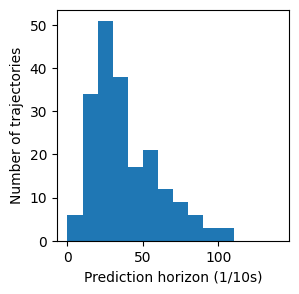

In [49]:
plt.figure(figsize=(3,3))
plt.hist(t_cutoff, bins=range(0, 141, 10))
plt.xlabel('Prediction horizon (1/10s)')
plt.ylabel('Number of trajectories')